In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

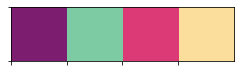

In [5]:
# palette = ['#045275', '#089099', '#7CCBA2', '#FCDE9C', '#DC3977', '#7C1D6F']
palette = ['#7C1D6F', '#7CCBA2', '#DC3977', '#FCDE9C']
columns = ['Confirmed', 'Recovered', 'Deaths', 'Active']
colors  = dict(zip(columns, palette))
sns.palplot(palette)

In [6]:
fold = '/Users/milko/Local/Data/Disease/datahub.io-covid-19/data/'
host = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/'

In [7]:
dset = pd.read_csv(
    fold + 'countries-aggregated.csv',
    parse_dates=['Date']
)
dset['Country'] = dset['Country'].apply(lambda x: 'United States' if x == 'US' else x)
dset['Active'] = dset['Confirmed'] - (dset['Recovered'] + dset['Deaths'])

In [8]:
dset.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


Text(2020-01-23 00:00:00, 125931, 'France')

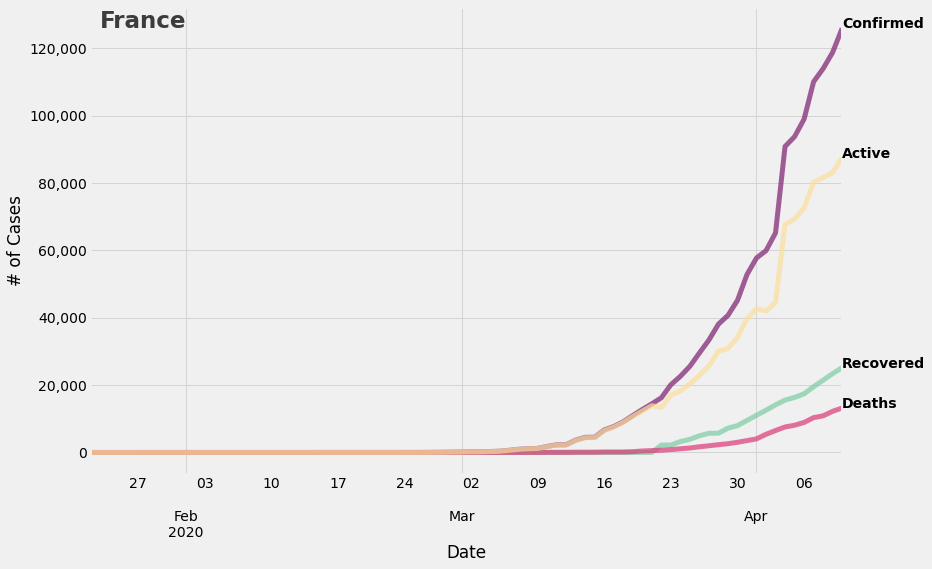

In [50]:
###
# Select country
###
country = 'France'

# Select data
df = dset[dset['Country'] == country].drop(columns='Country').copy()
df.set_index('Date', inplace=True)

# Set style
plt.style.use('fivethirtyeight')

# Generate plot
plot = df.plot(
    kind='line',
    figsize=(12,8),
    color=list(colors.values()), alpha=0.7,
    linewidth=5,
    legend=False
)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Assign colors
for column in list(colors.keys()):
    plot.text(
        x = df.index[-1], y = df[column].max(),
        # color = columns[column],
        s = column, weight = 'bold'
    )

# Add labels
plot.text(
    x = df.index[1], y = int(df.max().max()),
    s = country, fontsize = 23, weight = 'bold', alpha = 0.75
)